## Web Scraping
- Extracting data from website

## Why Web Scraping?
- Need data

## Before Scraping a Website - What Should You Do?
- Check if they have an API
- Check Website Robots.txt

## Web Scraping Libraries
- BeautifulSoup 
- requests
- splinter 

In [1]:
from bs4 import BeautifulSoup
import requests
from splinter import Browser

In [6]:
browser = Browser('chrome', headless = False)

In [7]:
url = 'https://www.nhl.com/'

browser.visit(url)
html = browser.html

In [8]:
soup = BeautifulSoup(html, 'html.parser')

In [13]:
soup.findAll('h4', {'class': 'mixed-feed__header-meta'})[0].text.strip()

'Friday Four: Golden Knights have hit their stride'

In [15]:
article_headers = []
for article in soup.findAll('h4', {'class': 'mixed-feed__header-meta'}):
    article_headers.append(article.text.strip())

In [18]:
soup.findAll('h5', {'class': 'mixed-feed__subheader'})[0].text.strip()

"NHL Network's Kevin Weekes also discusses Halak, Flames, Sabres"

In [19]:
sub_headers = []
for sub in soup.findAll('h5', {'class': 'mixed-feed__subheader'}):
    sub_headers.append(sub.text.strip())

In [26]:
soup.findAll('time')[0]['datetime']

'2018-12-21T12:00:32-0500'

In [27]:
dates = []
for date in soup.findAll('time'):
    dates.append(date['datetime'])

In [29]:
import pandas as pd

In [32]:
df = pd.DataFrame({'Headers': article_headers,
                  'Sub_Headers': sub_headers,
                  'Dates': dates})

In [34]:
df.dtypes

Headers        object
Sub_Headers    object
Dates          object
dtype: object

In [35]:
df['Dates'] = pd.to_datetime(df['Dates'])

In [36]:
df.head()

,Headers,Sub_Headers,Dates
0,Friday Four: Golden Knights have hit their stride,NHL Network's Kevin Weekes also discusses Hala...,2018-12-21 17:00:32
1,Happy Holidays from the NHL,The National Hockey League wishes you all a Ha...,2018-12-21 15:42:54
2,"John Isner, tennis star, joins 'NHL Fantasy on...","Top 10 player in world is avid Hurricanes fan,...",2018-12-20 19:02:10
3,"Facts and Figures: Memorable wins for Hart, Pr...",Lightning extend point streak; Matthews keeps ...,2018-12-21 15:50:28
4,2019 Draft Diary: Dylan Cozens,Lethbridge forward discusses second-half outlo...,2018-12-21 05:00:00


In [40]:
import matplotlib.pyplot as plt

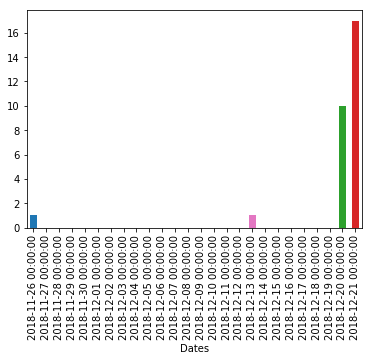

In [41]:
df.set_index('Dates').resample('D')['Headers'].count().plot(kind = 'bar')
plt.show()

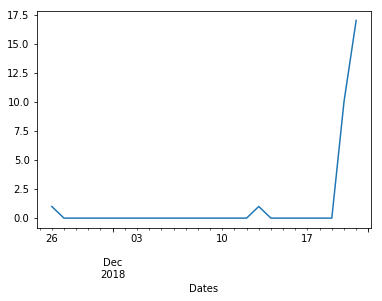

In [42]:
df.set_index('Dates').resample('D')['Headers'].count().plot(kind = 'line')
plt.show()

In [43]:
url = 'http://books.toscrape.com/'

In [44]:
browser = Browser('chrome', headless = False)
browser.visit(url)

In [45]:
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [48]:
soup.findAll('article', {'class': 'product_pod'})

[<article class="product_pod">
 <div class="image_container">
 <a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>
 <p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
 <div class="product_price">
 <p class="price_color">£51.77</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>, <article class="product_pod">
 <div class="image_container">
 <a href="catalogue/tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="thum

In [54]:
# Title
soup.findAll('article', {'class': 'product_pod'})[0].find('h3').find('a')['title']

'A Light in the Attic'

In [56]:
# URL
soup.findAll('article', {'class': 'product_pod'})[0].find('h3').find('a')['href']

'catalogue/a-light-in-the-attic_1000/index.html'

In [57]:
'http://books.toscrape.com/' + soup.findAll('article', {'class': 'product_pod'})[0].find('h3').find('a')['href']

'http://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html'

In [59]:
books = []
urls = []

for book in soup.findAll('article', {'class': 'product_pod'}):
    books.append(book.find('h3').find('a')['title'])
    my_url = 'http://books.toscrape.com/' + book.find('h3').find('a')['href']
    urls.append(my_url)

In [60]:
books

['A Light in the Attic',
 'Tipping the Velvet',
 'Soumission',
 'Sharp Objects',
 'Sapiens: A Brief History of Humankind',
 'The Requiem Red',
 'The Dirty Little Secrets of Getting Your Dream Job',
 'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
 'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
 'The Black Maria',
 'Starving Hearts (Triangular Trade Trilogy, #1)',
 "Shakespeare's Sonnets",
 'Set Me Free',
 "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
 'Rip it Up and Start Again',
 'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
 'Olio',
 'Mesaerion: The Best Science Fiction Stories 1800-1849',
 'Libertarianism for Beginners',
 "It's Only the Himalayas"]

In [61]:
urls

['http://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html',
 'http://books.toscrape.com/catalogue/tipping-the-velvet_999/index.html',
 'http://books.toscrape.com/catalogue/soumission_998/index.html',
 'http://books.toscrape.com/catalogue/sharp-objects_997/index.html',
 'http://books.toscrape.com/catalogue/sapiens-a-brief-history-of-humankind_996/index.html',
 'http://books.toscrape.com/catalogue/the-requiem-red_995/index.html',
 'http://books.toscrape.com/catalogue/the-dirty-little-secrets-of-getting-your-dream-job_994/index.html',
 'http://books.toscrape.com/catalogue/the-coming-woman-a-novel-based-on-the-life-of-the-infamous-feminist-victoria-woodhull_993/index.html',
 'http://books.toscrape.com/catalogue/the-boys-in-the-boat-nine-americans-and-their-epic-quest-for-gold-at-the-1936-berlin-olympics_992/index.html',
 'http://books.toscrape.com/catalogue/the-black-maria_991/index.html',
 'http://books.toscrape.com/catalogue/starving-hearts-triangular-trade-trilogy-1_990

In [62]:
df = pd.DataFrame({'Books': books,
                  'URLs': urls})

In [63]:
df

,Books,URLs
0,A Light in the Attic,http://books.toscrape.com/catalogue/a-light-in...
1,Tipping the Velvet,http://books.toscrape.com/catalogue/tipping-th...
2,Soumission,http://books.toscrape.com/catalogue/soumission...
3,Sharp Objects,http://books.toscrape.com/catalogue/sharp-obje...
4,Sapiens: A Brief History of Humankind,http://books.toscrape.com/catalogue/sapiens-a-...
5,The Requiem Red,http://books.toscrape.com/catalogue/the-requie...
6,The Dirty Little Secrets of Getting Your Dream...,http://books.toscrape.com/catalogue/the-dirty-...
7,The Coming Woman: A Novel Based on the Life of...,http://books.toscrape.com/catalogue/the-coming...
8,The Boys in the Boat: Nine Americans and Their...,http://books.toscrape.com/catalogue/the-boys-i...
9,The Black Maria,http://books.toscrape.com/catalogue/the-black-...


In [64]:
browser.click_link_by_text('next')

In [65]:
for x in range(0, 49):
    browser.click_link_by_text('next')

ElementDoesNotExist: no elements could be found with link by text "next"

In [66]:
url = 'http://books.toscrape.com/'
browser = Browser('chrome', headless = False)
browser.visit(url)
books = []
urls = []

for x in range(0, 50):
    html = browser.html
    soup = BeautifulSoup(html, 'html.parser')
    
    for book in soup.findAll('article', {'class': 'product_pod'}):
        books.append(book.find('h3').find('a')['title'])
        my_url = 'http://books.toscrape.com/' + book.find('h3').find('a')['href']
        urls.append(my_url)
        
    browser.click_link_by_text('next')

ElementDoesNotExist: no elements could be found with link by text "next"

In [68]:
len(books)

1000

In [69]:
import time

In [70]:
url = 'http://books.toscrape.com/'
browser = Browser('chrome', headless = False)
browser.visit(url)
books = []
urls = []

x = True
while x == True:
    html = browser.html
    soup = BeautifulSoup(html, 'html.parser')
    
    for book in soup.findAll('article', {'class': 'product_pod'}):
        books.append(book.find('h3').find('a')['title'])
        my_url = 'http://books.toscrape.com/' + book.find('h3').find('a')['href']
        urls.append(my_url)
    
    time.sleep(1)
    try:
        browser.click_link_by_text('next')
    except:
        x = False

In [71]:
len(books)

1000

In [72]:
len(urls)

1000

In [73]:
url = 'https://www.indeed.com/'
browser = Browser('chrome', headless = False)
browser.visit(url)

In [74]:
search_bar = browser.find_by_xpath('//*[@id="text-input-what"]')

In [76]:
search_bar.fill('Data Scientist')

In [77]:
where_bar = browser.find_by_xpath('//*[@id="text-input-where"]')

In [78]:
where_bar.fill('Hawaii')

In [79]:
where_bar.fill('')

In [80]:
where_bar.fill('Hawaii')

In [81]:
find_jobs = browser.find_by_xpath('//*[@id="whatWhere"]/form/div[3]/button')

In [82]:
find_jobs.click()